In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import glob
import pickle

In [5]:
f = './logs/debug/ctorus/2025-12-04_18-10-49_431053/eval/samples/gfn_samples.pkl'
d = pickle.load(open(f, 'rb'))

xy = torch.as_tensor(d['x'])
E = torch.as_tensor(d['energy'])

#Set up the proxy that was used and evaluate it on the domain:
from gflownet.proxy.torus import Torus
proxy = Torus(normalize=True, alpha=3.0, beta=2.0)

class env:
    n_dim=2

proxy.setup(env=env)

X = np.linspace(0,2*np.pi, num=50)
Y = np.linspace(0,2*np.pi, num=50)
X_, Y_ = np.meshgrid(X, Y)

Z_ = proxy(torch.tensor(np.stack([X_.ravel(), Y_.ravel()], axis=-1), dtype=torch.float32))


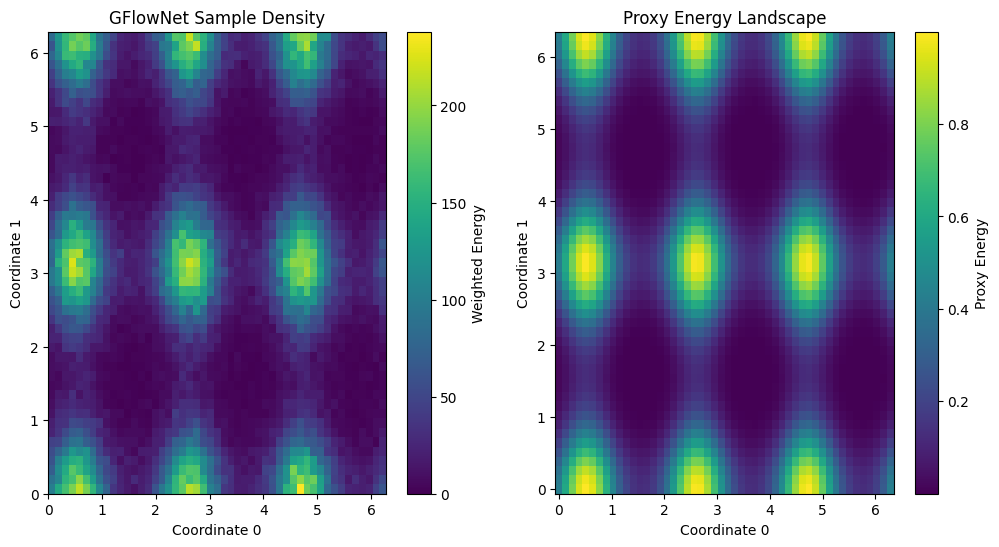

In [ ]:


#plot a heatmap with x,y coordiates xy[:, 0], xy[:, 1], weighted by E
fig, axs = plt.subplots(1, 2, figsize=(12, 6))


ax = axs[0]
ax.hist2d(xy[:, 0].numpy(), xy[:, 1].numpy(),  bins=(X, Y), cmap='viridis')
fig.colorbar(ax.collections[0], ax=ax, label='Energy')
ax.set_title("GFlowNet Sample Density")



ax = axs[1]
ax.pcolormesh(X_, Y_, Z_.numpy().reshape(X_.shape), shading='auto', cmap='viridis')
fig.colorbar(ax.collections[0], ax=ax, label='Proxy Energy')
ax.set_title("Proxy Energy Landscape")


for ax in axs:
    ax.set_xlabel('Coordinate 0')
    ax.set_ylabel('Coordinate 1')






plt.show()



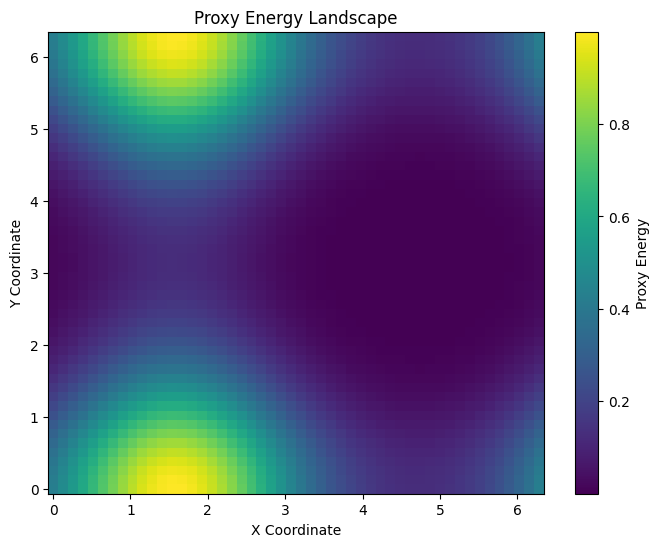

In [ ]:


#plt the Z_ as a heatmap over X_, Y_
plt.figure(figsize=(8, 6))

